# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Yuchen Ding
*   Your **student number**: 1010743420

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [2]:
df.head()


,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature = df.drop('article_url',axis=1)
feature = feature.drop('shares',axis=1)
target = df['shares']

X_train, X_val, y_train, y_val = train_test_split(feature, target, train_size=0.8, random_state=1)

In [4]:
for column in X_train:
  column_mean_xt = X_train[column].mean()
  column_std_xt = X_train[column].std()

  X_train[column] = (X_train[column] - column_mean_xt) / column_std_xt
  X_val[column] = (X_val[column] - column_mean_xt) / column_std_xt


In [5]:
X_train.insert(0, 'Intercept', 1)
X_val.insert(0, 'Intercept', 1)

We should insert column of 1s after to standardization because it will prevent the value of 1s being influenced by standardization,which makes this column become mean of 0. Standardization will affect future linear regression to represent the intercept of the model. And

The original training and validation set scaling process would be affected by the standardization of column of 1s because this column does not represent any feature data which is meaningless to standardize.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy import linalg
import scipy.linalg

In [7]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

def Direct_sol (X_train, y_train , X_val, y_val):
  W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights

  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_val = np.dot(X_val, W) # prediction on the validation set

  RMSE_train_DR = rmse(y_pred_train, y_train)
  RMSE_val_DR = rmse(y_pred_val, y_val)
  print("Direct solution RMSE on training set:", RMSE_train_DR)
  print("Direct solution RMSE on validation set:", RMSE_val_DR)

  return W , y_pred_train , y_pred_val , RMSE_train_DR , RMSE_val_DR

W , y_pred_train , y_pred_val , RMSE_train_DR , RMSE_val_DR = Direct_sol(X_train, y_train , X_val, y_val)


Direct solution RMSE on training set: 12166.041370956531
Direct solution RMSE on validation set: 8267.482321466996


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [8]:
import time
start_time = time.time() ## Records current time
np.random.seed(2)

w = (np.random.rand(X_train.shape[1])/1000) # Inital weights
lr = 0.01  # Learning rate
CT =  RMSE_val_DR * 1.01 # Convergence requirement
rmse_train = []
rmse_val = []

for epoch in range (5000):
  y_pred_train = np.dot(X_train,w.T).flatten()
  rmse_train.append(rmse(y_pred_train,y_train))

  y_pred_val = np.dot(X_val,w.T).flatten()
  rmse_val.append(rmse(y_pred_val,y_val))

  if rmse(y_pred_val,y_val) <= CT:
    print(f'The GD stops at epoch = {epoch}')
    break

  gradient = np.dot(X_train.T, (y_pred_train - y_train.values.flatten())) / len(y_train)
  w = w - lr * gradient # Weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

The GD stops at epoch = 87
--- Total Training Time: 3.7589850425720215 (s) ---


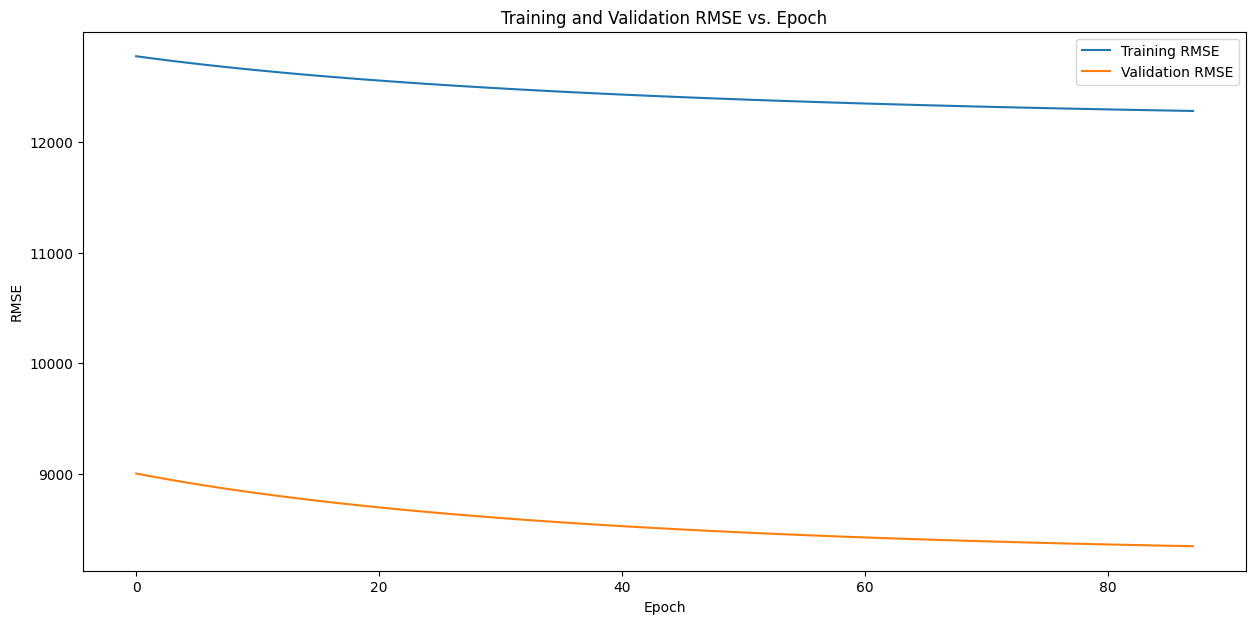

In [9]:
plt.figure(figsize=(15,7))
plt.plot(rmse_train, label='Training RMSE')
plt.plot(rmse_val, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend()
plt.show()

From the RMSE for both training and validation set above, the training set has higher rmse than validation,  both of them present decreasing trend of rmse and finally achieve convergence when epoch = 87 which means the full batch GD works for this model and achieves convergence. However, the large rmse for both training and validation could be model underfit because linear regression is too simple for this large dataset with differentiated data even it is standardized.


In stochastic GD, each of the n samples is a batch, and onee epoch takes n iterations. In mini-batch GD, it breaks dataset to k smaller batches (mini batch), and one epoch takes k iterations.

For example, if the whole dataset has 1000 samples and we set minibatch size to 10. In this case, stochastic GD will take each sample as batch size so it will have 1000 iterations per epoch. Mini-batch GD will have 100 iterations per epoch because of the minibatch size = 10.

Obviously, the main difference betweeen stochastic and mini-batch GD is the decision on their batch size


## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [10]:
def mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, lr, CT):

  start_time = time.time()  # Records current time
  np.random.seed(2)

  # Initial weights with the correct shape (1D array)
  w = (np.random.random(X_train.shape[1])/1000) # Inital weights
  rmse_train = []
  rmse_val = []
  time_elapse = []

  for epoch in range(5000):
    # Shuffle the dataset
    shuffled_indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train.iloc[shuffled_indices].reset_index(drop=True)
    y_train_shuffled = y_train.iloc[shuffled_indices].reset_index(drop=True)

    for i in range(0, X_train.shape[0], batch_size):

      X_train_mini = X_train_shuffled[i:i + batch_size]
      y_train_mini = y_train_shuffled[i:i + batch_size]

      # Predict and calculate gradient for mini-batch
      y_pred_mini = np.dot(X_train_mini,w.T)
      gradient = np.dot(X_train_mini.T, (y_pred_mini - y_train_mini.values.flatten())) / len(y_train_mini)
      w = w - lr * gradient

    # Predict on the full training and validation sets
    y_pred_train = np.dot(X_train, w.T)
    y_pred_val = np.dot(X_val, w.T)

    rmse_train.append(rmse(y_pred_train, y_train))
    rmse_val.append(rmse(y_pred_val, y_val))
    time_elapse.append(time.time() - start_time)

    # Check for convergence using RMSE
    if rmse(y_pred_val, y_val) <= CT:
      print(f'For batch size of {batch_size}, The GD stops at epoch = {epoch}')
      break
    # Check if mini-batch GD does not converge
    elif rmse(y_pred_val, y_val) >= 1.5*CT:
      print('Did not converge')
      break

  return w, rmse_train, rmse_val, time_elapse

# Try batch sizes that are powers of two
batch_sizes = [500,1000,2000,4000,8000,16000]

results = {}
for batch_size in batch_sizes:
  w, rmse_train, rmse_val, time_elapse = mini_batch_GD(X_train, y_train, X_val, y_val,batch_size, lr=0.01, CT=RMSE_val_DR*1.001)
  results[batch_size] = (w, rmse_train, rmse_val, time_elapse)


For batch size of 500, The GD stops at epoch = 2
For batch size of 1000, The GD stops at epoch = 5
For batch size of 2000, The GD stops at epoch = 10
For batch size of 4000, The GD stops at epoch = 20
For batch size of 8000, The GD stops at epoch = 40
For batch size of 16000, The GD stops at epoch = 82


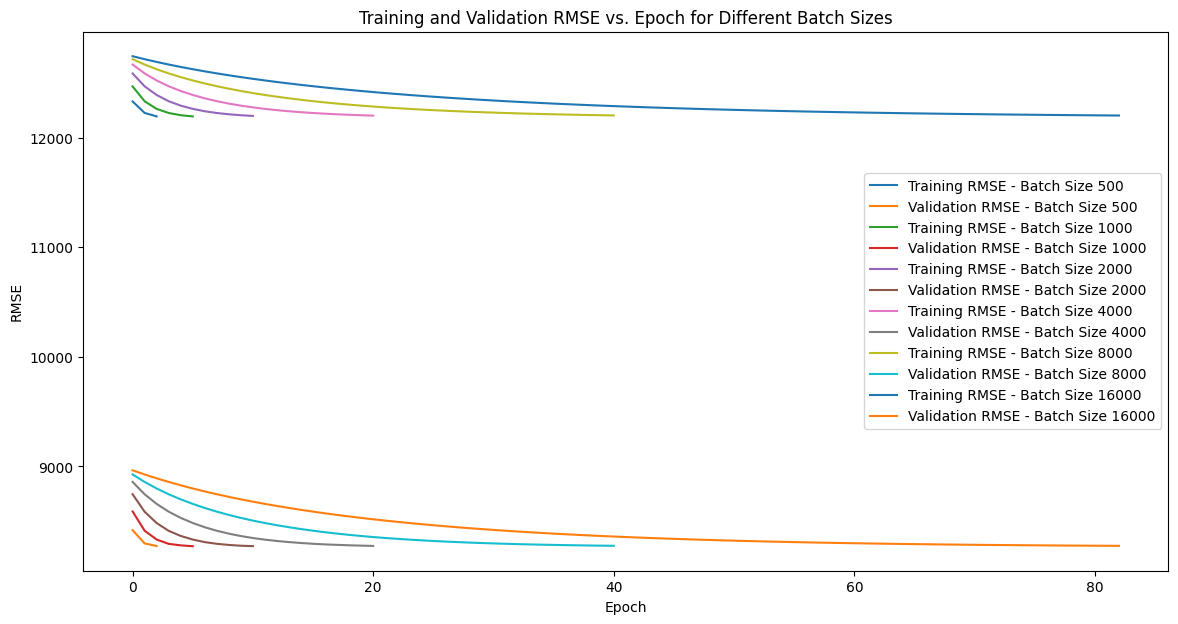

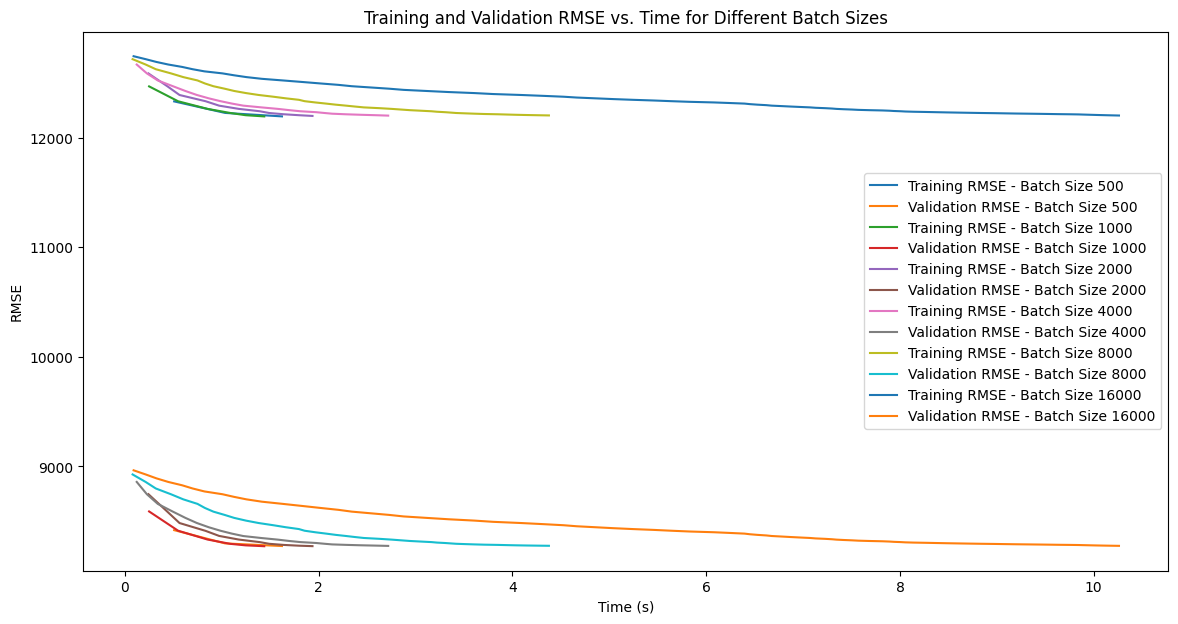

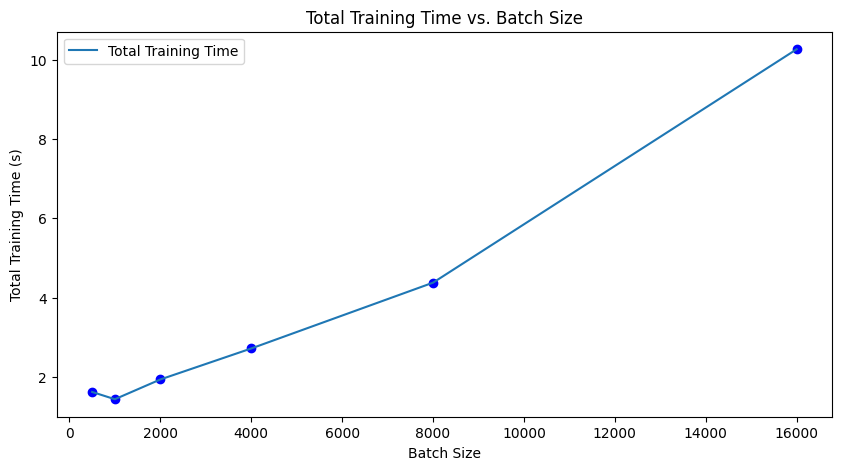

In [11]:
# As the five batch size all converge(have epoch stop value) that meets the CT, no need to check convergence in code

# Plot training and validation RMSE vs. epoch for all converging batch sizes
plt.figure(figsize=(14, 7))
for batch_size, (w, rmse_train, rmse_val, time_elapse) in results.items():
  plt.plot(rmse_train, label=f'Training RMSE - Batch Size {batch_size}')
  plt.plot(rmse_val, label=f'Validation RMSE - Batch Size {batch_size}')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch for Different Batch Sizes')
plt.legend()
plt.show()

# Plot training and validation RMSE vs. time for all converging batch sizes
plt.figure(figsize=(14, 7))
for batch_size, (w, rmse_train, rmse_val, time_elapse) in results.items():
  plt.plot(time_elapse, rmse_train, label=f'Training RMSE - Batch Size {batch_size}')
  plt.plot(time_elapse, rmse_val, label=f'Validation RMSE - Batch Size {batch_size}')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Time for Different Batch Sizes')
plt.legend()
plt.show()

# Plot total training time vs. batch size
batch_sizes = []
total_times = []
for batch_size, (w, rmse_train, rmse_val, time_elapse) in results.items():
  batch_sizes.append(batch_size)
  total_times.append(time_elapse[-1])
plt.figure(figsize=(10, 5))
plt.scatter(batch_sizes, total_times, color='blue')
plt.plot(batch_sizes, total_times, label='Total Training Time')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (s)')
plt.title('Total Training Time vs. Batch Size')
plt.legend()
plt.show()

Through traversing five batch size, we can see that smaller batch size requires less running time till convergence because large batch size requires more calculation complexity which includes large scale matrix inversion and dot product.

All the batch sizes that we try will converge to the same rmse for training and validation set accordingly.Which means linear regression can capture the patterns of data regardless which batch size we choose. However, the relative high rmse(12000 for training and 8000 for validation) may because the model is too simple. Polynomial regression would fit the data with less rmse.

Meanwhile, the smaller batch size uses less epoch to achieve convergence because the weight(w) is updated more frequently for small batch. The larger batch gradient descent route is more smooth and gentle ran small batch because larger batch size update weights less frequently as well as less noise.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [12]:
def mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, lrs, CT):
  results = []

  for lr in lrs:
    np.random.seed(2)
    w = (np.random.random(X_train.shape[1])/1000)  # Initial weights
    best_rmse_train = float('inf')
    best_rmse_val = float('inf')

    for epoch in range(5000):
      # Shuffle the dataset
      shuffled_indices = np.random.permutation(X_train.shape[0])
      X_train_shuffled = X_train.iloc[shuffled_indices].reset_index(drop=True)
      y_train_shuffled = y_train.iloc[shuffled_indices].reset_index(drop=True)

      for i in range(0, X_train.shape[0], batch_size):
        X_train_mini = X_train_shuffled[i:i + batch_size]
        y_train_mini = y_train_shuffled[i:i + batch_size]

        # Predict and calculate gradient for mini-batch
        y_pred_mini = np.dot(X_train_mini, w.T)
        gradient = np.dot(X_train_mini.T, (y_pred_mini - y_train_mini.values.flatten())) / len(y_train_mini)
        w -= lr * gradient

      # Predict on the full training and validation sets
      y_pred_train = np.dot(X_train, w.T)
      y_pred_val = np.dot(X_val, w.T)

      rmse_train = rmse(y_pred_train, y_train)
      rmse_val = rmse(y_pred_val, y_val)

      # Update best RMSE if found better
      if rmse_val < best_rmse_val:
        best_rmse_train = rmse_train
        best_rmse_val = rmse_val

      # Check for convergence or divergence
      if rmse(y_pred_val, y_val) <= CT:
        print(f'For batch size of {batch_size}, the GD stops at epoch = {epoch}')
        break

      # Check if mini-batch GD does not converge
      elif rmse(y_pred_val, y_val) >= 1.5*CT:
        print(f'For batch size of {batch_size}, did not converge at learning rate = {lr}')
        break

      # Store the best result for this learning rate
    results.append({
        'batch_size': batch_size,
        'learning_rate': lr,
        'best_rmse_train': best_rmse_train,
        'best_rmse_val': best_rmse_val
    })

  return results

# Collecting results
all_results = []
batch_sizes = [32,64,128]
learning_rates = [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for batch_size in batch_sizes:
    batch_results = mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, learning_rates, CT=RMSE_val_DR*1.001)
    all_results.extend(batch_results)

# Creating DataFrame to display results
results_df = pd.DataFrame(all_results)



For batch size of 32, did not converge at learning rate = 0.01
For batch size of 32, did not converge at learning rate = 0.009
For batch size of 32, did not converge at learning rate = 0.008
For batch size of 32, did not converge at learning rate = 0.007
For batch size of 32, did not converge at learning rate = 0.006
For batch size of 32, did not converge at learning rate = 0.005
For batch size of 32, did not converge at learning rate = 0.004
For batch size of 32, did not converge at learning rate = 0.003
For batch size of 32, did not converge at learning rate = 0.002
For batch size of 32, the GD stops at epoch = 2
For batch size of 64, did not converge at learning rate = 0.01
For batch size of 64, did not converge at learning rate = 0.009
For batch size of 64, did not converge at learning rate = 0.008
For batch size of 64, did not converge at learning rate = 0.007
For batch size of 64, did not converge at learning rate = 0.006
For batch size of 64, did not converge at learning rate = 

In [13]:
# Table for finding learning rate results
results_df

,batch_size,learning_rate,best_rmse_train,best_rmse_val
0,32,0.010,12453.376798,8424.608101
1,32,0.009,12397.942391,8402.126786
2,32,0.008,12348.769002,8382.438395
3,32,0.007,12305.690479,8365.013823
4,32,0.006,12268.674058,8349.235694
5,32,0.005,12237.899472,8334.452763
6,32,0.004,12213.898796,8320.007930
7,32,0.003,31406.309781,8283.458501
8,32,0.002,13514.779971,8279.990308
9,32,0.001,12183.370924,8274.652154


After traversing learning rate from 0.1 to 0.001 for batch sizes 32,64,128 that did not converge in part 4, we observe that decreasing learning rate can help smaller batch size to converge. That is because small batch size may result in differentiated step length, it would always miss the global minimum if the learning rate is large. In this case, learning rate 0.001 could let these three batches above to achieve convergence.

In [14]:
# In part 4, the fastest convergence time occurs at batch size = 500

def mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, lrs, CT):
  results = []

  for lr in lrs:
    start_time = time.time()
    time_elapse = []
    np.random.seed(2)
    w = (np.random.random(X_train.shape[1])/1000)  # Initial weights
    rmse_train = []
    rmse_val = []

    for epoch in range(5000):
      # Shuffle the dataset
      shuffled_indices = np.random.permutation(X_train.shape[0])
      X_train_shuffled = X_train.iloc[shuffled_indices].reset_index(drop=True)
      y_train_shuffled = y_train.iloc[shuffled_indices].reset_index(drop=True)

      for i in range(0, X_train.shape[0], batch_size):
        X_train_mini = X_train_shuffled[i:i + batch_size]
        y_train_mini = y_train_shuffled[i:i + batch_size]

        # Predict and calculate gradient for mini-batch
        y_pred_mini = np.dot(X_train_mini, w.T)
        gradient = np.dot(X_train_mini.T, (y_pred_mini - y_train_mini.values.flatten())) / len(y_train_mini)
        w -= lr * gradient

      # Predict on the full training and validation sets
      y_pred_train = np.dot(X_train, w.T)
      y_pred_val = np.dot(X_val, w.T)

      rmse_train.append(rmse(y_pred_train, y_train))
      rmse_val.append(rmse(y_pred_val, y_val))
      time_elapse.append(time.time() - start_time)

      # Check for convergence or divergence
      if rmse(y_pred_val, y_val) <= CT:
        print(f'For batch size of {batch_size}, the GD stops at epoch = {epoch}')
        break

      # Check if mini-batch GD does not converge
      elif rmse(y_pred_val, y_val) >= 1.5*CT:
        print(f'For batch size of {batch_size}, did not converge at learning rate = {lr}')
        break

      # Store the best result for this learning rate
    results.append({
        'batch_size': batch_size,
        'learning_rate': lr,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val,
        'time_elapse': time_elapse,
    })

  return results

# Collecting results
all_results = []
batch_sizes = [500]
lrs = [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for batch_size in batch_sizes:
    batch_results = mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, lrs, CT=RMSE_val_DR*1.001)
    all_results.extend(batch_results)

# Creating DataFrame to display results
results_df = pd.DataFrame(all_results)



For batch size of 500, the GD stops at epoch = 2
For batch size of 500, the GD stops at epoch = 3
For batch size of 500, the GD stops at epoch = 3
For batch size of 500, the GD stops at epoch = 3
For batch size of 500, the GD stops at epoch = 4
For batch size of 500, the GD stops at epoch = 5
For batch size of 500, the GD stops at epoch = 6
For batch size of 500, the GD stops at epoch = 8
For batch size of 500, the GD stops at epoch = 12
For batch size of 500, the GD stops at epoch = 26


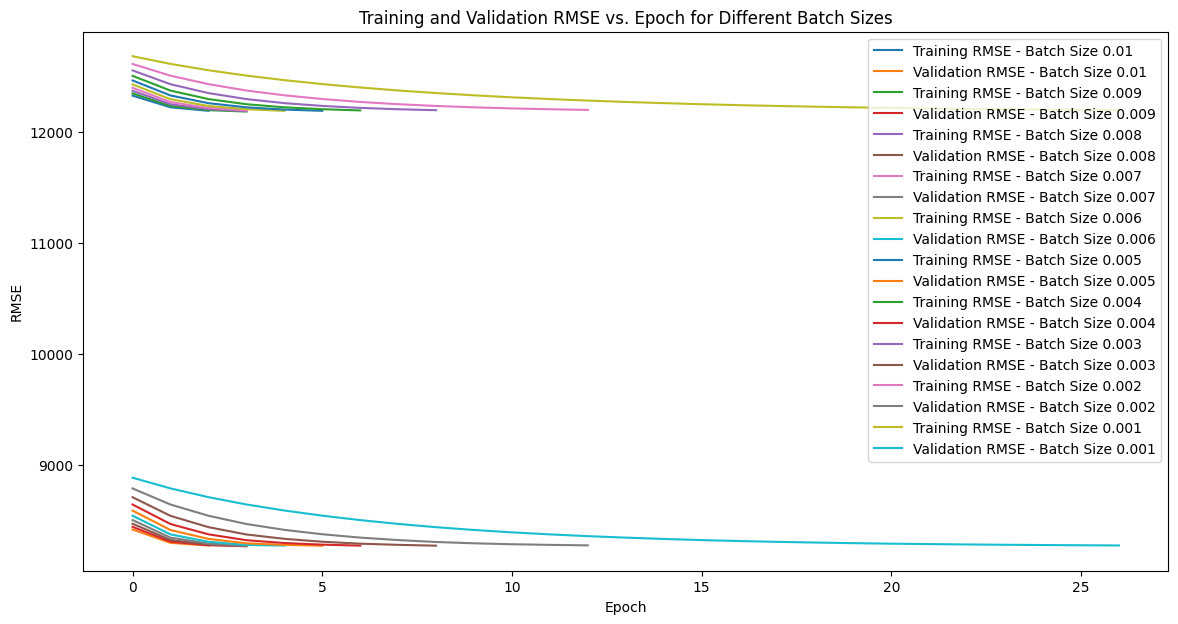

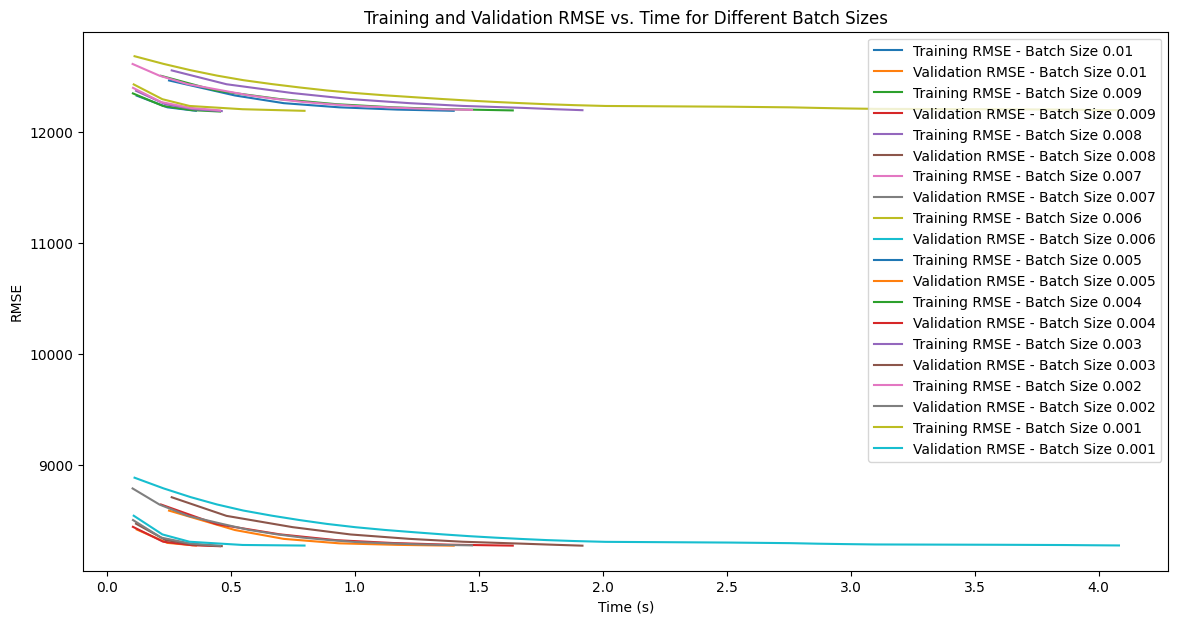

In [15]:
# Plot training and validation RMSE vs. epoch for all converging batch sizes
plt.figure(figsize=(14, 7))
for i in range(10):
  plt.plot(results_df.iloc[i,2], label=f'Training RMSE - Batch Size {results_df.iloc[i,1]}')
  plt.plot(results_df.iloc[i,3], label=f'Validation RMSE - Batch Size {results_df.iloc[i,1]}')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch for Different Batch Sizes')
plt.legend()
plt.show()

# Plot training and validation RMSE vs. time for all converging batch sizes
plt.figure(figsize=(14, 7))
for i in range(10):
  plt.plot(results_df.iloc[i,4], results_df.iloc[i,2], label=f'Training RMSE - Batch Size {results_df.iloc[i,1]}')
  plt.plot(results_df.iloc[i,4], results_df.iloc[i,3], label=f'Validation RMSE - Batch Size {results_df.iloc[i,1]}')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Time for Different Batch Sizes')
plt.legend()
plt.show()


By picking the fastest batch size 500 from part 4 and traverse 10 learning rates from 0.1 to 0.001, we observe that there is negative correlation between running time and learning rate. When we decrease the learning rate, the running time the same batch size will increase because the step length is decreasing, it takes much more steps to achieve the same convergence.

Reference:

1: APS 1070 Tutorial 4

2:https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html

3: Declaration of using AI tools: https://chat.openai.com/share/5e601c5c-0f2d-439c-9a3f-02786c960d7f